The following cells are for: 
- Creating visualisations to understand and investigate the data

In [1]:
# Importing Relevant Packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Importing YouTube Datasets
video_description_df = pd.read_csv("/home/chigoz/Downloads/Disso/00. Inputs/Video_Description_Table.csv", delimiter = ";")
video_statistics_df = pd.read_csv("/home/chigoz/Downloads/Disso/00. Inputs/Video_Statistics_Table.csv", delimiter = ";")
video_comments_df = pd.read_csv("/home/chigoz/Downloads/Disso/00. Inputs/Video_Comments_Table.csv", delimiter = ";")
video_tags_df = pd.read_csv("/home/chigoz/Downloads/Disso/00. Inputs/Video_Tags_Table.csv", delimiter = ";")

# Importing Google Analytics Dataset
ga_df = pd.read_csv("/home/chigoz/Downloads/Disso/00. Inputs/Google_Analytics_Users.csv")

In [3]:
# Converting the date column into datetime format
ga_df['date']= pd.to_datetime(ga_df['date'],format='%m/%d/%y')

# Splitting the date column into year, month and day columns
ga_df['year']= ga_df['date'].dt.year
ga_df['month']= ga_df['date'].dt.month
ga_df['day']= ga_df['date'].dt.day

In [4]:
# Viewing video description dataframe
video_description_df.head()

,date,video_id,video_title,video_description
0,2021/06/22,3Cg8-eoNXdY,SLIM FIT DENIM JEANS LATEST PICK UPS + COLLECT...,This video has been sponsored by @FarFetch\nGE...
1,2021/06/13,zgXoCGUcR9w,"☀️☀️SUMMER OUTFIT PICKUPS UNBOXING | TMONCLER,...",THIS VIDEO HAS BEEN SPONSORED BY @SEVEN STORE\...
2,2021/06/09,AFpME2E2GAY,"MONTHLY DESIGNER SELECTIONS UNBOXING &amp, TRY...",THIS VIDEO HAS BEEN SPONSORED BY LUISAVIAROMA\...
3,2021/06/03,4TJCzY3Ph88,"ULTIMATE BALENCIAGA TRIPLE S , TRACK &amp, SPE...",This video has been sponsored @Browns \n@Brown...
4,2021/05/27,TX3TFXp2y2M,🔥🔥 6 HOT MENSWEAR SUMMER SALES HAPPENING RIGHT...,https://thehoxtontrend.com/latest-spring-sales...


In [5]:
# Renaming Columns on Video Statistic Table
video_statistics_df.rename(columns={'views':'video_views', 'likes':'video_likes', 'dislikes':'video_dislikes', 'comments':'comments_count'}, inplace = True)
video_statistics_df.head()

,video_id,video_views,video_likes,video_dislikes,comments_count
0,3Cg8-eoNXdY,3275,106,8,36
1,zgXoCGUcR9w,4295,173,7,39
2,AFpME2E2GAY,5642,209,3,38
3,4TJCzY3Ph88,4134,136,6,38
4,TX3TFXp2y2M,7385,220,4,14


In [6]:
# Removing unneeded columns from dataframe
video_comments_df = video_comments_df[["video_id", "comment", "likes"]]

# Aggregating comments into list by video_id
all_comments = video_comments_df.groupby('video_id')['comment'].apply(list)
all_comments = pd.DataFrame(all_comments)
all_comments = all_comments.rename(columns={'comment':'all_comments'})

# Adding up comments likes by video_id
total_comments_likes = video_comments_df.groupby('video_id')['likes'].sum()
total_comments_likes = pd.DataFrame(total_comments_likes)
total_comments_likes = total_comments_likes.rename(columns={'likes':'total_comment_likes'})

# Merging all comments and total comments likes columns
aggregated_comments_df = all_comments.merge(total_comments_likes, on='video_id')
aggregated_comments_df.head()

,all_comments,total_comment_likes
video_id,,
-62No0ZxYdo,[CHECK OUT OUR LASTEST STONE ISLAND CHEST RIG ...,221
-_sRqyAV21g,[It will go either of two ways get more expens...,132
-gTkxpx8sok,"[Love it Hox. Keep making the great videos, lo...",241
0-ZCc21ot_M,[The pictures on the website didnt give these ...,212
0IQxwquZ1z8,[For steals and deals from Authorised Stockist...,137


In [7]:
# Aggregating tags into list by video_id
all_tags_df = video_tags_df.groupby('video_id')['tag_value'].apply(list)
all_tags_df = pd.DataFrame(all_tags_df)
all_tags_df = all_tags_df.rename(columns={'tag_value':'video_tags'})
all_tags_df.head()

,video_tags
video_id,
-62No0ZxYdo,"[harrods outlet westfield, harrods outlet, har..."
-_sRqyAV21g,"[mens fashion, tkmaxx outfit challenge, stone ..."
-gTkxpx8sok,"[mens fashion, tkmaxx outfit challenge, stone ..."
0-ZCc21ot_M,"[MA STRUM, MENS JACKETS, COMPETITION, AQUASCUT..."
0IQxwquZ1z8,"[mens fashion, canada goose, 2020 chilliwack, ..."


In [8]:
# Merging individual dataframes YouTube Data Dataframe for Exploratory Analysis
yt_df = video_description_df.merge(video_statistics_df, on='video_id')
yt_df = yt_df.merge(aggregated_comments_df, on='video_id')
yt_df = yt_df.merge(all_tags_df, on='video_id')

# Removing unneeded columns from dataframe
yt_df = yt_df[['date', 'video_id', 'video_title', 'video_description', 'video_tags', 'video_views', 'video_likes', 'video_dislikes', 'all_comments', 'comments_count', 'total_comment_likes']]

# Converting the date column into datetime format
yt_df['date']= pd.to_datetime(yt_df['date'],format='%Y/%m/%d')

# Splitting the date column into year, month and day columns
yt_df['year']= yt_df['date'].dt.year
yt_df['month']= yt_df['date'].dt.month
yt_df['day']= yt_df['date'].dt.day

yt_df.head()

,date,video_id,video_title,video_description,video_tags,video_views,video_likes,video_dislikes,all_comments,comments_count,total_comment_likes,year,month,day
0,2021-06-22,3Cg8-eoNXdY,SLIM FIT DENIM JEANS LATEST PICK UPS + COLLECT...,This video has been sponsored by @FarFetch\nGE...,"[mens fashion, Denim Jeans, Slim fit denim, Sk...",3275,106,8,[GET AN EXTRA 15% OFF SALE ITEMS @FARFETCH ...,36,31,2021,6,22
1,2021-06-13,zgXoCGUcR9w,"☀️☀️SUMMER OUTFIT PICKUPS UNBOXING | TMONCLER,...",THIS VIDEO HAS BEEN SPONSORED BY @SEVEN STORE\...,"[mens fashion, MENS SUMMER OUTFITS, MENS SUMME...",4295,173,7,[GET 15% OFF WITH CODE 'THT15' WORKS ON NEW SE...,39,21,2021,6,13
2,2021-06-09,AFpME2E2GAY,"MONTHLY DESIGNER SELECTIONS UNBOXING &amp, TRY...",THIS VIDEO HAS BEEN SPONSORED BY LUISAVIAROMA\...,"[mens fashion, tkmaxx outfit challenge, stone ...",5642,209,3,"[I like that orange moncler jacket!, My favour...",38,31,2021,6,9
3,2021-06-03,4TJCzY3Ph88,"ULTIMATE BALENCIAGA TRIPLE S , TRACK &amp, SPE...",This video has been sponsored @Browns \n@Brown...,"[mens fashion, tkmaxx outfit challenge, stone ...",4134,136,6,[ENTER OUR 250 COMPETITION GIVEAWAY TO SPEND a...,38,34,2021,6,3
4,2021-05-27,TX3TFXp2y2M,🔥🔥 6 HOT MENSWEAR SUMMER SALES HAPPENING RIGHT...,https://thehoxtontrend.com/latest-spring-sales...,"[mens fashion, tkmaxx outfit challenge, stone ...",7385,220,4,"[Reppin the Patta collab! , Thanks picking up ...",14,14,2021,5,27


In [9]:
# Setting size and specifications of visualisations

sns.set(rc={'figure.figsize':(13, 7)})

# Numeric Data

In [10]:
## Summary Statistics 

In [11]:
## Correlation

# Google Analytics Data

## 1. Daily Website Users Counts

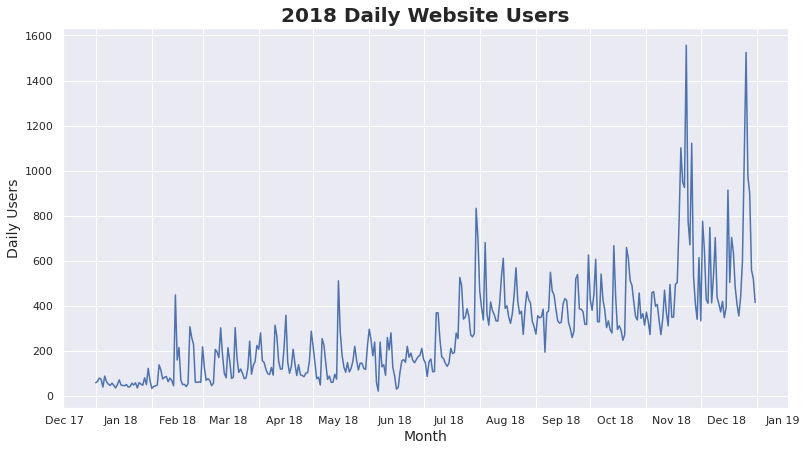

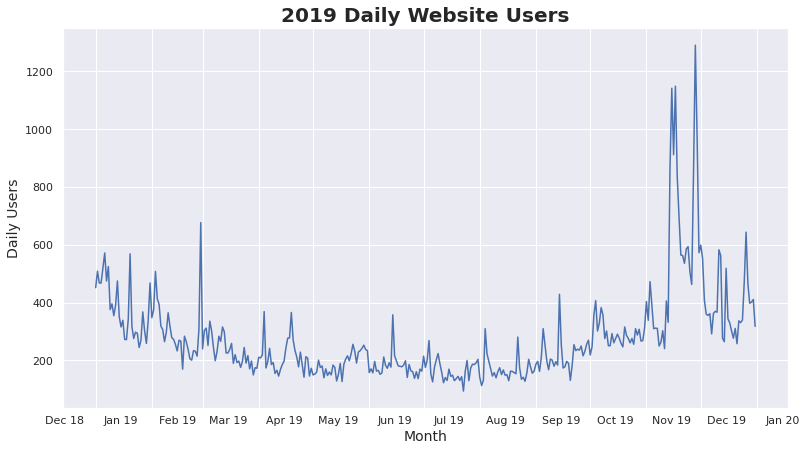

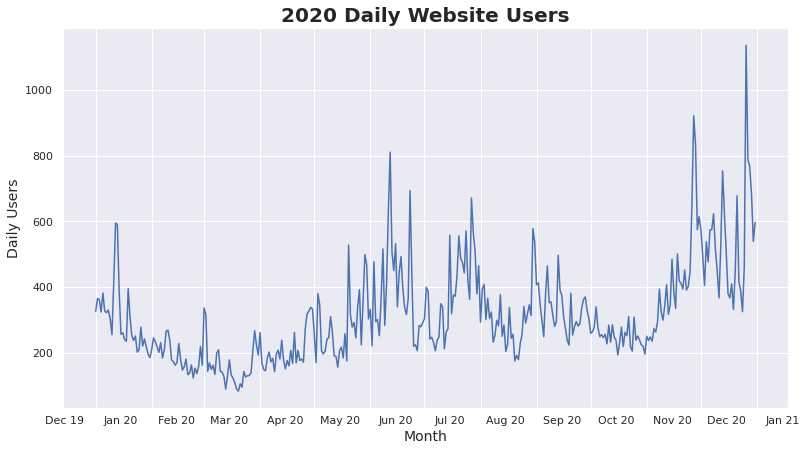

In [12]:
# Full Years in Data
years = [2018, 2019, 2020]

# Looping through each year
for x in years:

    # Setting up line plot
    ax = sns.lineplot(x='date',y='users',data = ga_df[ga_df['year']==x])
    
    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Daily Website Users', fontsize='20', weight='bold')
    ax.set_xlabel('Month', fontsize='14')
    ax.set_ylabel('Daily Users', fontsize='14')
    
    # Setting x axis labels location in the centre
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
    
    # Setting the format of x axis labels
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%b %y'))
    
    # Saving figure
    plt.savefig('daily_website_users_'+ str(x) +'.png')
    
    plt.show()

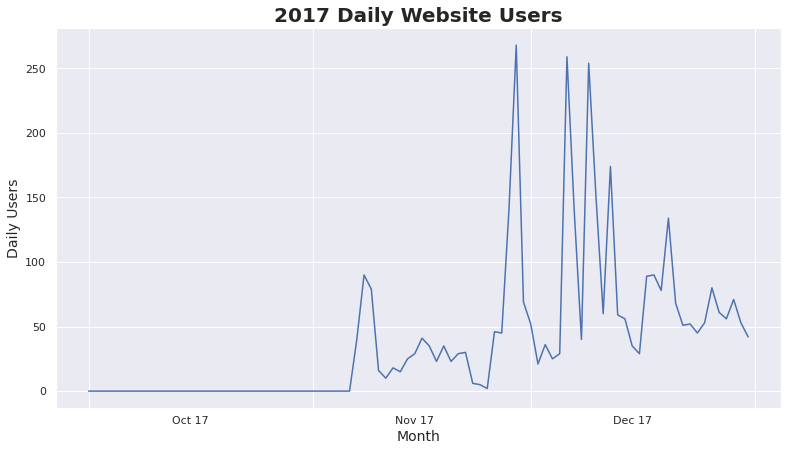

In [13]:
# Setting up line plot
ax = sns.lineplot(x='date',y='users',data = ga_df[ga_df['year']==2017])

# Setting the title, x and y axis labels
ax.set_title('2017 Daily Website Users', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Daily Users', fontsize='14')

# Setting x axis labels location in the centre
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

# Setting the format of x axis labels
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b %y'))

# Saving figure
plt.savefig('daily_website_users_'+ str(2017) +'.png')

plt.show()

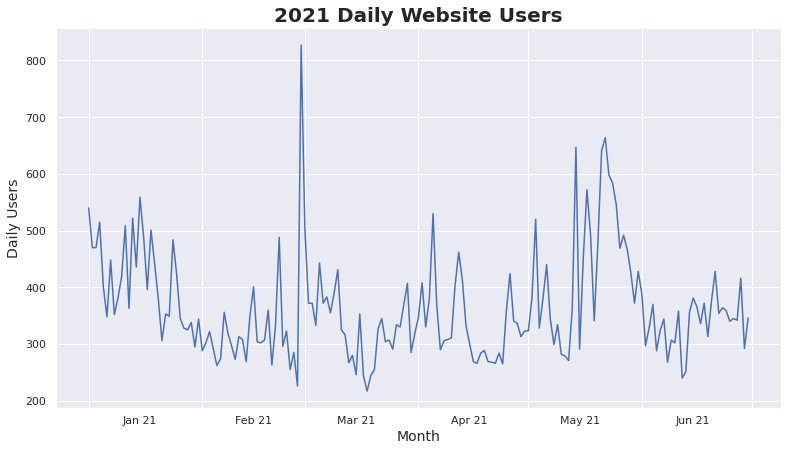

In [14]:
# Setting up line plot
ax = sns.lineplot(x='date',y='users',data = ga_df[ga_df['year']==2021])

# Setting the title, x and y axis labels
ax.set_title('2021 Daily Website Users', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Daily Users', fontsize='14')

# Setting x axis labels location in the centre
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

# Setting the format of x axis labels
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b %y'))

# Saving figure
plt.savefig('daily_website_users_'+ str(2021) +'.png')

plt.show()

# YouTube Analytics Data

## 2. Monthly Video Uploads Count

In [15]:
# Creating dataset with uploads count per month
uploads = yt_df.groupby(by = ['year', 'month']).count()
uploads.reset_index(inplace = True)

uploads.head()

,year,month,date,video_id,video_title,video_description,video_tags,video_views,video_likes,video_dislikes,all_comments,comments_count,total_comment_likes,day
0,2017,11,12,12,12,12,12,12,12,12,12,12,12,12
1,2017,12,9,9,9,9,9,9,9,9,9,9,9,9
2,2018,1,4,4,4,4,4,4,4,4,4,4,4,4
3,2018,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2018,3,7,7,7,7,7,7,7,7,7,7,7,7


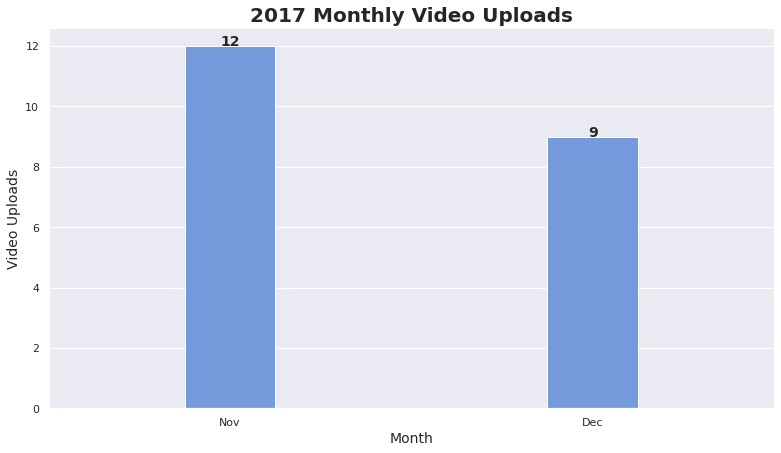

In [16]:
# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'video_id',data = uploads[uploads['year']==2017], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2017 Monthly Video Uploads', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Uploads', fontsize='14')

# Function to change width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Changing width of the width
change_width(ax, .25)

# Setting x axis tick labels
ax.set_xticklabels(['Nov', 'Dec'])

# Function to show values at the top of the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_uploads_'+ str(2017) +'.png')

plt.show()

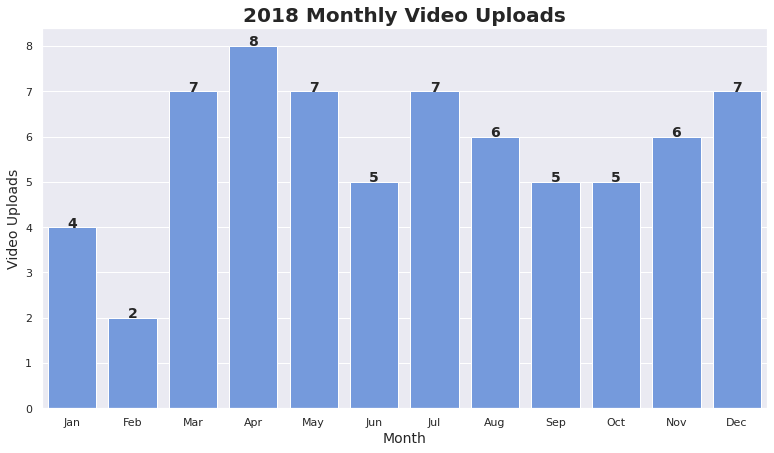

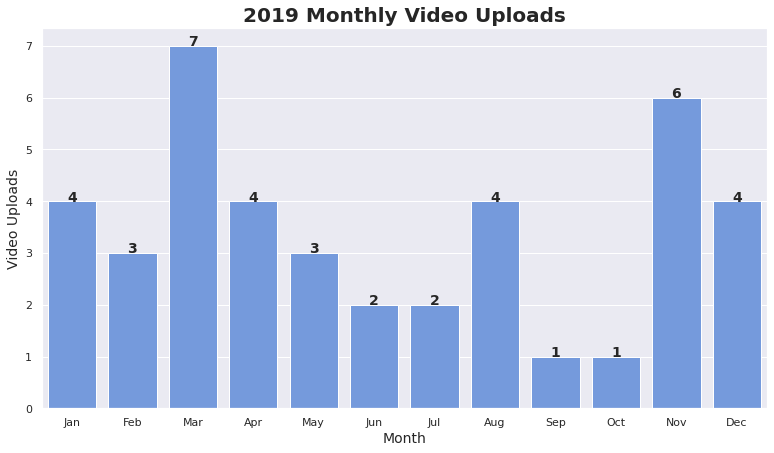

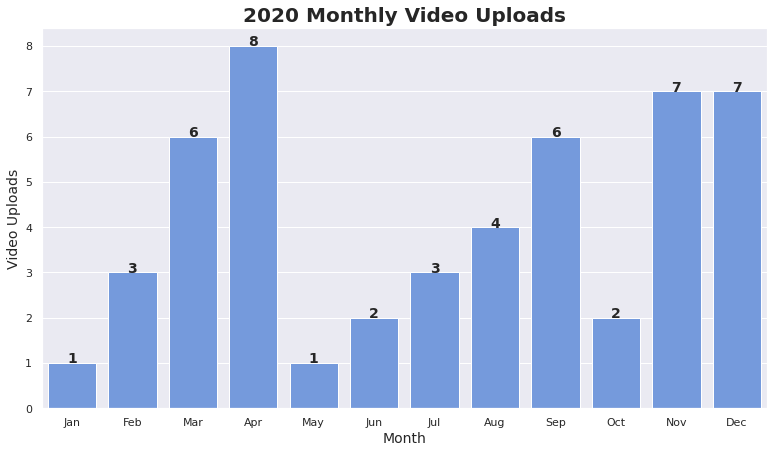

In [17]:
cal_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Looping through each year
for x in years:

    # Creating dataset with uploads count per month
    uploads = yt_df.groupby(by = ['year', 'month']).count()
    uploads.reset_index(inplace = True)

    # Setting up bar chart
    ax = sns.barplot(x = 'month', y = 'video_id',data = uploads[uploads['year']==x], color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Monthly Video Uploads', fontsize='20', weight='bold')
    ax.set_xlabel('Month', fontsize='14')
    ax.set_ylabel('Video Uploads', fontsize='14')

    # Setting x axis tick labels
    ax.set_xticklabels(cal_months) 

    # Showing values at the top of the bar
    show_values_on_bars(ax)

    # Saving figure
    plt.savefig('monthly_video_uploads_'+ str(x) +'.png')
    
    plt.show()

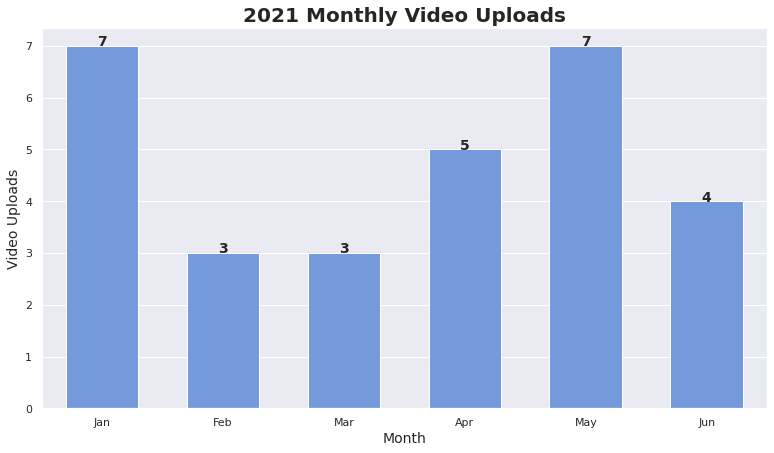

In [18]:
# Creating dataset with uploads count per month
uploads = yt_df.groupby(by = ['year', 'month']).count()
uploads.reset_index(inplace = True)

# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'video_id',data = uploads[uploads['year']==2021], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2021 Monthly Video Uploads', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Uploads', fontsize='14')

# Changing width of the width
change_width(ax, .6)

# Setting x axis tick labels
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_uploads_'+ str(2021) +'.png')

plt.show()

## 3. Monthly Video Views Count

In [19]:
# Creating dataset with views and likes/dislikes count per month
views_likes = yt_df.groupby(by = ['year', 'month']).sum()
views_likes.reset_index(inplace = True)

views_likes.head()

,year,month,video_views,video_likes,video_dislikes,comments_count,total_comment_likes,day
0,2017,11,238464,4626,96,796,1194,214
1,2017,12,507772,6333,284,944,2942,121
2,2018,1,73902,1705,41,380,643,44
3,2018,2,47085,1178,21,163,190,13
4,2018,3,2299800,17966,1254,1290,10661,103


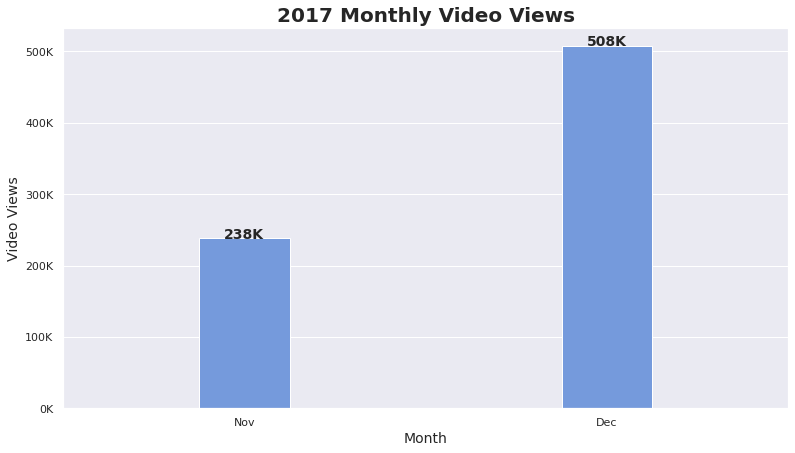

In [20]:
# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'video_views',data = views_likes[views_likes['year']==2017], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2017 Monthly Video Views', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Views', fontsize='14')

# Function to change width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Changing width of the width
change_width(ax, .25)

# Setting x axis tick labels
ax.set_xticklabels(['Nov', 'Dec'])

# Changing the y axis labels to thousands
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: str(format(int(x/1000)) + 'K')))

# Function to show values at the top of the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}K'.format((p.get_height())/1000)
            ax.text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_views_'+ str(2017) +'.png')

plt.show()

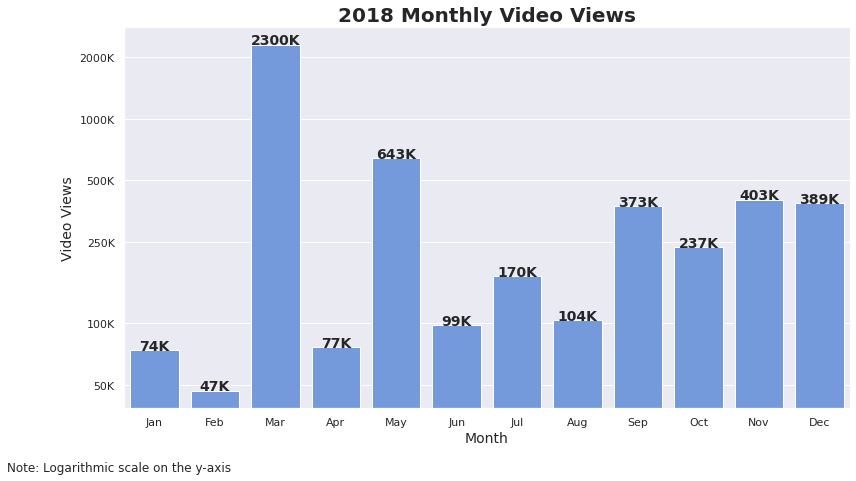

In [21]:
cal_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Creating dataset with uploads count per month
uploads = yt_df.groupby(by = ['year', 'month']).count()
uploads.reset_index(inplace = True)

# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'video_views',data = views_likes[views_likes['year']==2018], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2018 Monthly Video Views', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Views', fontsize='14')

# Setting x axis tick labels
ax.set_xticklabels(cal_months) 

# Changing the y axis from a linear to a logarithmic scale
ax.set_yscale('log')
ax.set_yticks([50000, 100000, 250000, 500000, 1000000, 2000000])
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())

# Changing the y axis labels to thousands
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: str(format(int(x/1000)) + 'K')))

# Note calling out the Logarithmic Scale
plt.figtext(0, 0, "Note: Logarithmic scale on the y-axis")

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_views_'+ str(2018) +'.png')

plt.show()

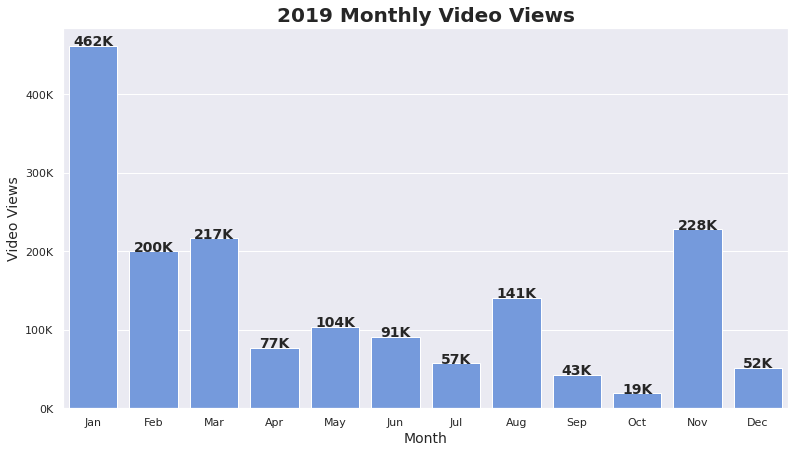

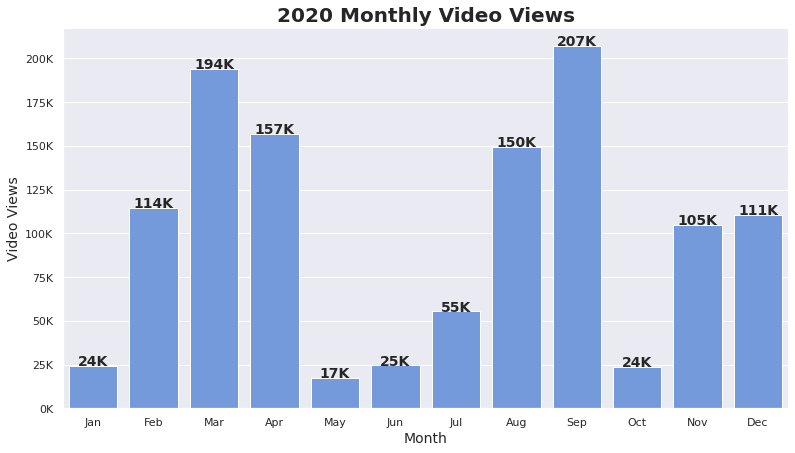

In [22]:
cal_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2019, 2020]

# Looping through each year
for x in years:

    # Creating dataset with uploads count per month
    uploads = yt_df.groupby(by = ['year', 'month']).count()
    uploads.reset_index(inplace = True)

    # Setting up bar chart
    ax = sns.barplot(x = 'month', y = 'video_views',data = views_likes[views_likes['year']==x], color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Monthly Video Views', fontsize='20', weight='bold')
    ax.set_xlabel('Month', fontsize='14')
    ax.set_ylabel('Video Views', fontsize='14')

    # Setting x axis tick labels
    ax.set_xticklabels(cal_months) 
    
    # Changing the y axis labels to thousands
    ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: str(format(int(x/1000)) + 'K')))
    
    # Showing values at the top of the bar
    show_values_on_bars(ax)
    
    # Saving figure
    plt.savefig('monthly_video_views_'+ str(x) +'.png')
    
    plt.show()

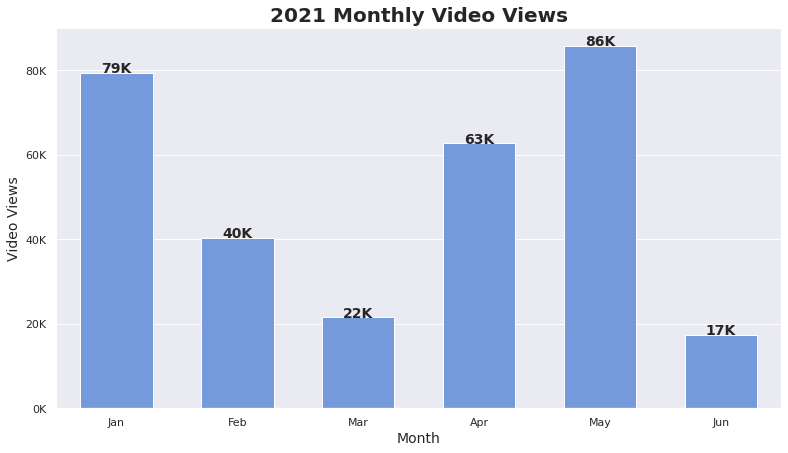

In [23]:
# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'video_views',data = views_likes[views_likes['year']==2021], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2021 Monthly Video Views', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Views', fontsize='14')

# Function to change width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Changing width of the width
change_width(ax, .6)

# Setting x axis tick labels
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Changing the y axis labels to thousands
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: str(format(int(x/1000)) + 'K')))

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_views_'+ str(2021) +'.png')

plt.show()

## 4. Top 5 Viewed Videos

In [24]:
# Merging Video Title to Dataframe
top_5 = yt_df

# Creating Likes and Dislikes Ratio (adding a constant to avoid infinity)
top_5["likes_dislikes_ratio"] = top_5["video_likes"]/(top_5["video_dislikes"]+1)

# Removing irrelevant fields
top_5 = top_5[["video_id", "year", "video_title", "video_views", "comments_count", "likes_dislikes_ratio"]]

top_5.head()

,video_id,year,video_title,video_views,comments_count,likes_dislikes_ratio
0,3Cg8-eoNXdY,2021,SLIM FIT DENIM JEANS LATEST PICK UPS + COLLECT...,3275,36,11.777778
1,zgXoCGUcR9w,2021,"☀️☀️SUMMER OUTFIT PICKUPS UNBOXING | TMONCLER,...",4295,39,21.625000
2,AFpME2E2GAY,2021,"MONTHLY DESIGNER SELECTIONS UNBOXING &amp, TRY...",5642,38,52.250000
3,4TJCzY3Ph88,2021,"ULTIMATE BALENCIAGA TRIPLE S , TRACK &amp, SPE...",4134,38,19.428571
4,TX3TFXp2y2M,2021,🔥🔥 6 HOT MENSWEAR SUMMER SALES HAPPENING RIGHT...,7385,14,44.000000


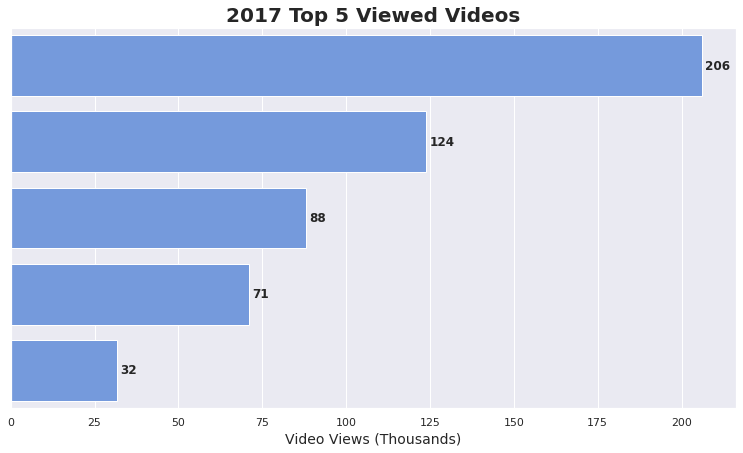

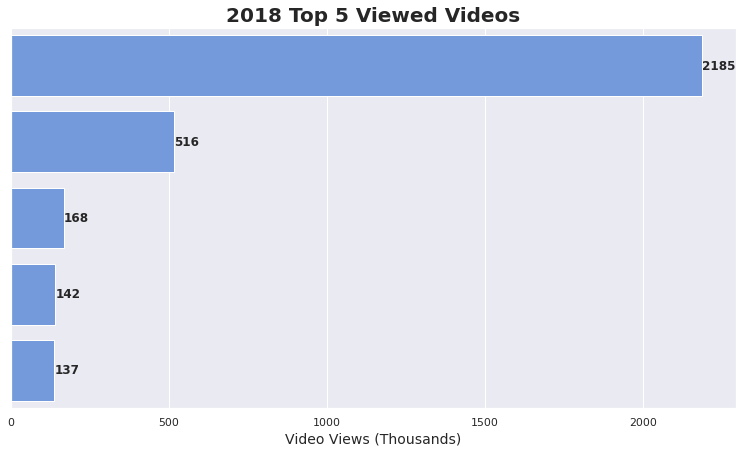

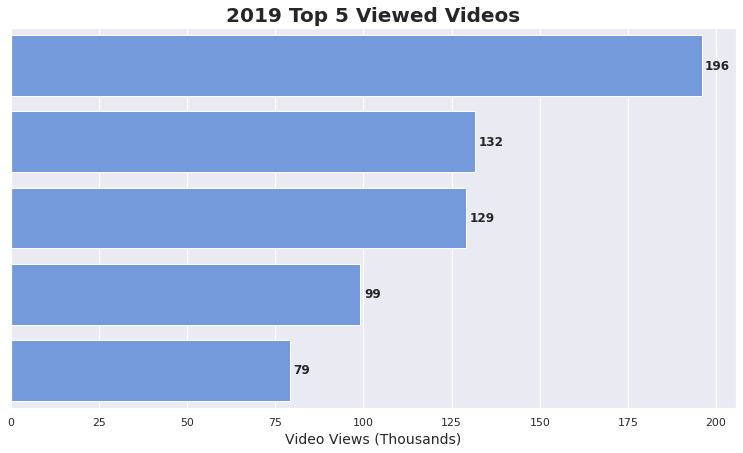

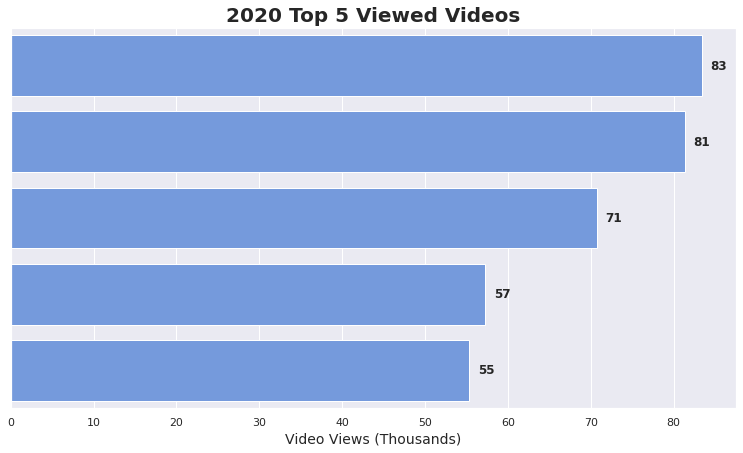

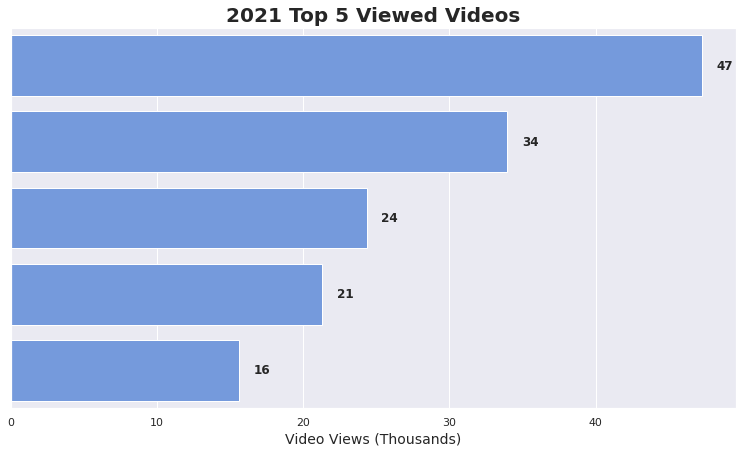

In [25]:
# Years for graphs
years = [2017, 2018, 2019, 2020, 2021]

for x in years:
    
    # Sorting and selcting top 5 values of dataframe
    top_5_views = top_5[top_5['year']==x].sort_values(by = 'video_views', ascending = False)[:5]
    top_5_views['video_views'] = top_5_views['video_views']/1000
    
    # Creating the bar chart
    ax = sns.barplot(x = 'video_views', y = 'video_title',data = top_5_views, color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Top 5 Viewed Videos', fontsize='20', weight='bold')
    ax.set_xlabel('Video Views (Thousands)', fontsize='14')
    ax.set_ylabel('', fontsize='14')

    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width + 1,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.0f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center',
               weight = 'bold')  # vertical alignment
    
    # Removing y axis tick lables
    ax.set(yticklabels=[])
    
    # Saving figure
    plt.savefig('top_5_viewed_videos_'+ str(x) +'.png')
    
    plt.show()

In [26]:
top_5_likes = top_5[top_5['year']==2021].sort_values(by = 'likes_dislikes_ratio', ascending = False)[:5]
list(top_5_likes["video_title"])

['SPRING/SUMMER 2021 MYSTERY UNBOXING  | MONCLER + CP COMPANY DESIGNER',
 '⚽⚽ STONE ISLAND BUYS ITALIAN FOOTBALL CLUB ??',
 'THIS IS DESIGNER POP UP STORE&#39,S BIGGEST CP COMPANY CLEARANCE SALE YET !!!',
 '😲 😲 REVISTING STONE ISLAND OUTLET AFTER LOCKDOWN MAY 2021',
 'MONTHLY DESIGNER SELECTIONS UNBOXING &amp, TRY-ON  | FT Stone Island, Palm Angels, Ksubi, Moncler, AMI']

## 5. Monthly Video Likes and Dislikes Count

In [27]:
# Creating dataframe for monthly video likes and dislikes
likes_dislikes = views_likes[['year', 'month', 'video_likes', 'video_dislikes']]
likes_dislikes = pd.melt(likes_dislikes, id_vars = ['year', 'month'], var_name=['type'])

# Sorting dataframe by year and month
likes_dislikes.sort_values(by = ['year', 'month'], inplace = True)

likes_dislikes.head()

,year,month,type,value
0,2017,11,video_likes,4626
44,2017,11,video_dislikes,96
1,2017,12,video_likes,6333
45,2017,12,video_dislikes,284
2,2018,1,video_likes,1705


/home/chigoz/anaconda3/envs/ml_module/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


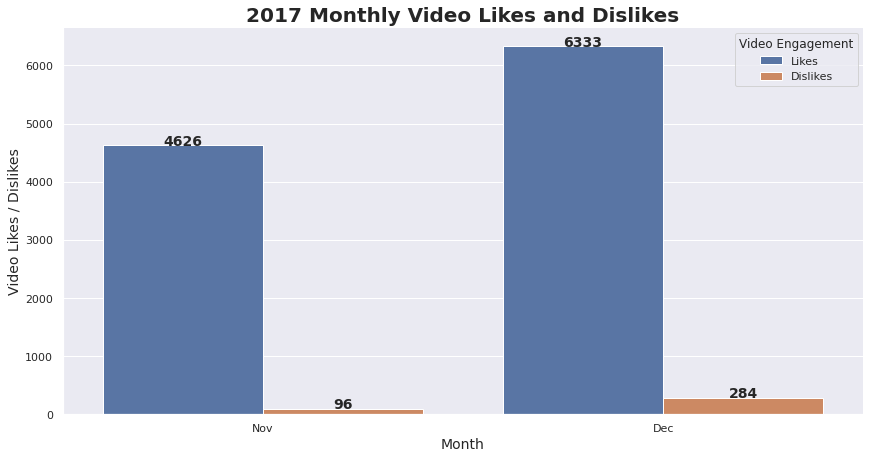

In [28]:
# Setting up bar chart
ax = sns.catplot(x = 'month', y = 'value', hue = 'type', kind='bar', size=6, aspect=2, data = likes_dislikes[likes_dislikes['year']==2017], legend = False)

# Setting the title, x and y axis labels
ax.axes[0,0].set_title('2017 Monthly Video Likes and Dislikes', fontsize='20', weight='bold')
ax.axes[0,0].set_xlabel('Month', fontsize='14')
ax.axes[0,0].set_ylabel('Video Likes / Dislikes', fontsize='14')

# Setting x axis tick labels
ax.axes[0,0].set_xticklabels(['Nov', 'Dec'])

# Function to show values at the top of the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.axes[0,0].patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format((p.get_height()))
            ax.axes[0,0].text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Showing values at the top of the bar
show_values_on_bars(ax)

legend_labels, _= ax.axes[0,0].get_legend_handles_labels()
ax.axes[0,0].legend(legend_labels, ['Likes','Dislikes'], 
          bbox_to_anchor=(1,1), 
          title='Video Engagement')

# Saving figure
plt.savefig('monthly_video_likes_dislikes_'+ str(2017) +'.png')

plt.show()

/home/chigoz/anaconda3/envs/ml_module/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


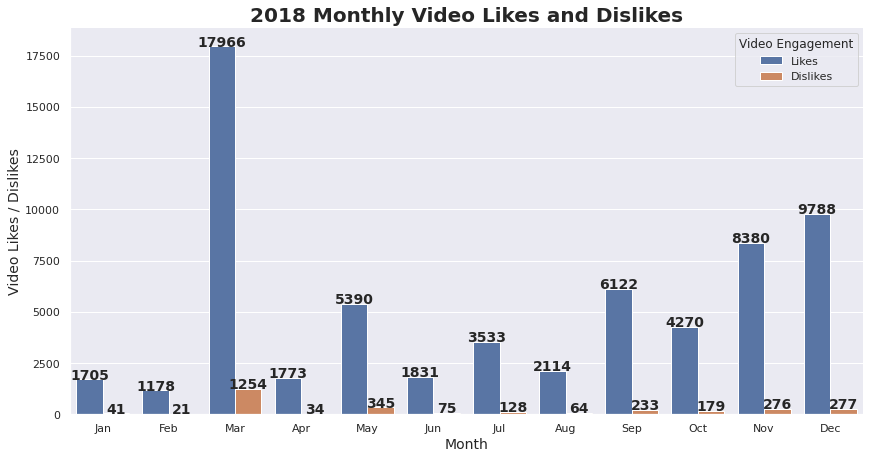

/home/chigoz/anaconda3/envs/ml_module/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


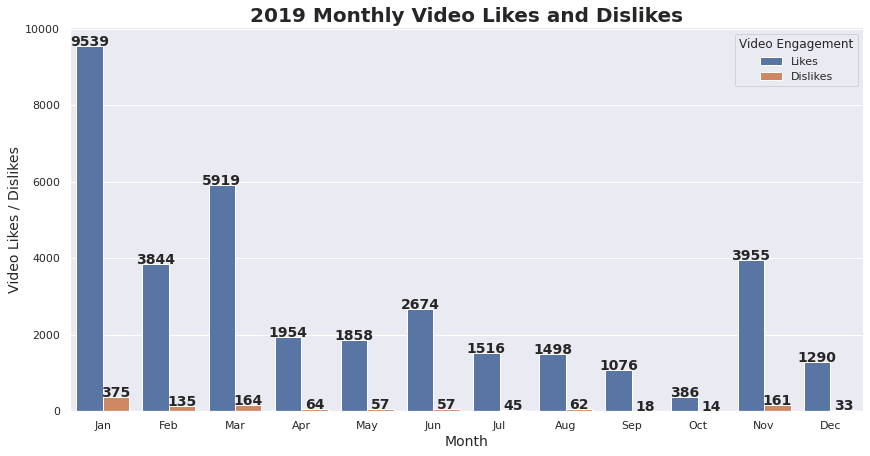

/home/chigoz/anaconda3/envs/ml_module/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


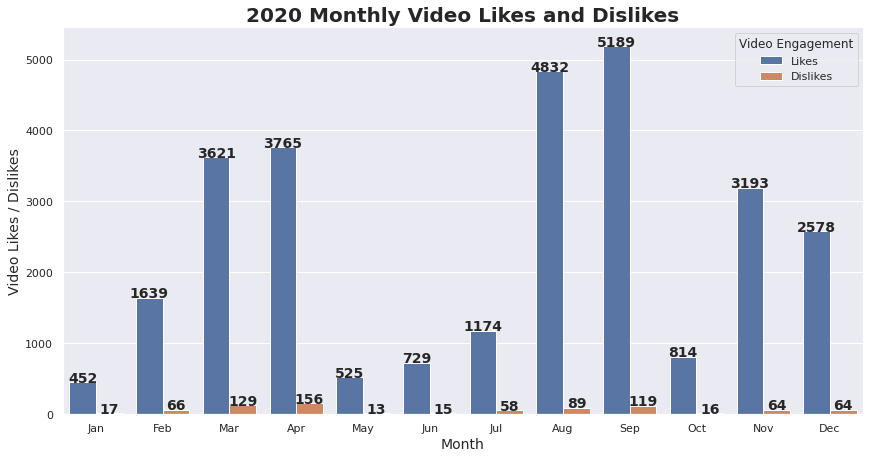

In [29]:
cal_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2018, 2019, 2020]

# Looping through each year
for x in years:

    # Setting up bar chart
    ax = sns.catplot(x = 'month', y = 'value', hue = 'type', kind='bar', size=6, aspect=2, data = likes_dislikes[likes_dislikes['year']==x], legend = False)

    # Setting the title, x and y axis labels
    ax.axes[0,0].set_title(str(x) + ' Monthly Video Likes and Dislikes', fontsize='20', weight='bold')
    ax.axes[0,0].set_xlabel('Month', fontsize='14')
    ax.axes[0,0].set_ylabel('Video Likes / Dislikes', fontsize='14')

    # Setting x axis tick labels
    ax.axes[0,0].set_xticklabels(cal_months)

    # Function to show values at the top of the bar
    def show_values_on_bars(axs):
        def _show_on_single_plot(ax):        
            for p in ax.axes[0,0].patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = '{:.0f}'.format((p.get_height()))
                ax.axes[0,0].text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

        if isinstance(axs, np.ndarray):
            for idx, ax in np.ndenumerate(axs):
                _show_on_single_plot(ax)
        else:
            _show_on_single_plot(axs)

    # Showing values at the top of the bar
    show_values_on_bars(ax)

    legend_labels, _= ax.axes[0,0].get_legend_handles_labels()
    ax.axes[0,0].legend(legend_labels, ['Likes','Dislikes'], 
              bbox_to_anchor=(1,1), 
              title='Video Engagement')
    
    # Saving figure
    plt.savefig('monthly_video_likes_dislikes_'+ str(x) +'.png')
    
    plt.show()

/home/chigoz/anaconda3/envs/ml_module/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


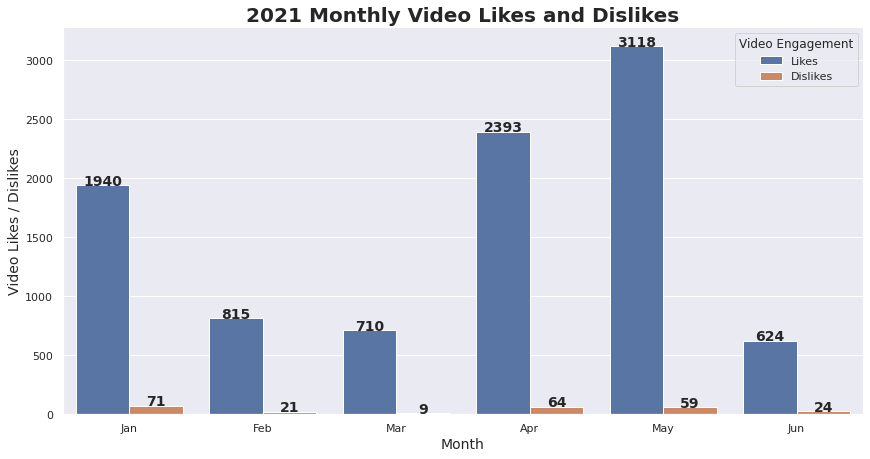

In [30]:
# Setting up bar chart
ax = sns.catplot(x = 'month', y = 'value', hue = 'type', kind='bar', size=6, aspect=2, data = likes_dislikes[likes_dislikes['year']==2021], legend = False)

# Setting the title, x and y axis labels
ax.axes[0,0].set_title('2021 Monthly Video Likes and Dislikes', fontsize='20', weight='bold')
ax.axes[0,0].set_xlabel('Month', fontsize='14')
ax.axes[0,0].set_ylabel('Video Likes / Dislikes', fontsize='14')

# Setting x axis tick labels
ax.axes[0,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Function to show values at the top of the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.axes[0,0].patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format((p.get_height()))
            ax.axes[0,0].text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Showing values at the top of the bar
show_values_on_bars(ax)

legend_labels, _= ax.axes[0,0].get_legend_handles_labels()
ax.axes[0,0].legend(legend_labels, ['Likes','Dislikes'], 
          bbox_to_anchor=(1,1), 
          title='Video Engagement')

# Saving figure
plt.savefig('monthly_video_likes_dislikes_'+ str(2021) +'.png')

plt.show()

## 6. Monthly Comments Count

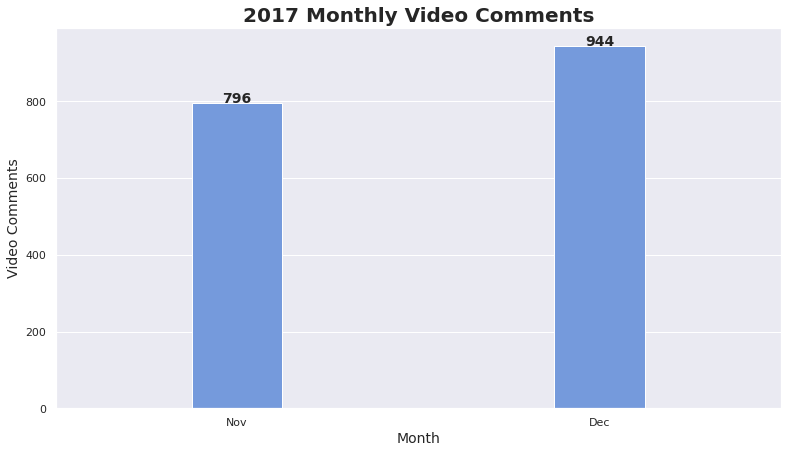

In [31]:
# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'comments_count', data = views_likes[views_likes['year']==2017], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2017 Monthly Video Comments', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Comments', fontsize='14')

# Function to change width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Changing width of the width
change_width(ax, .25)

# Setting x axis tick labels
ax.set_xticklabels(['Nov', 'Dec'])

# Changing the y axis labels to thousands
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x))))

# Function to show values at the top of the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format((p.get_height()))
            ax.text(_x, _y, value, ha="center", weight='bold', fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_comments_'+ str(2017) +'.png')

plt.show()

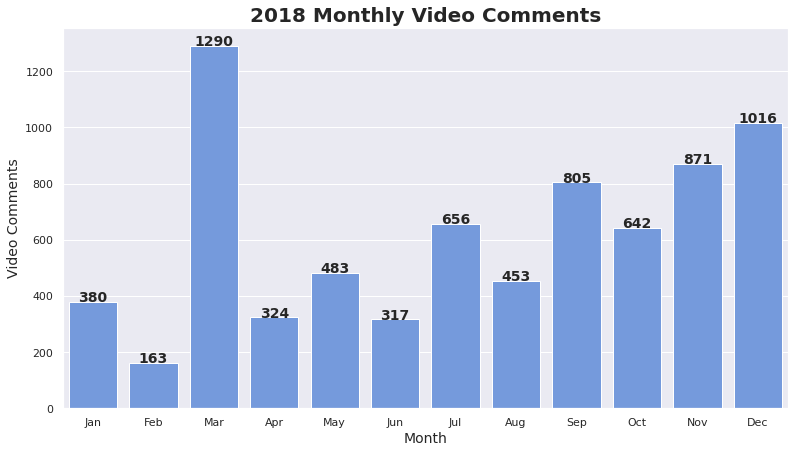

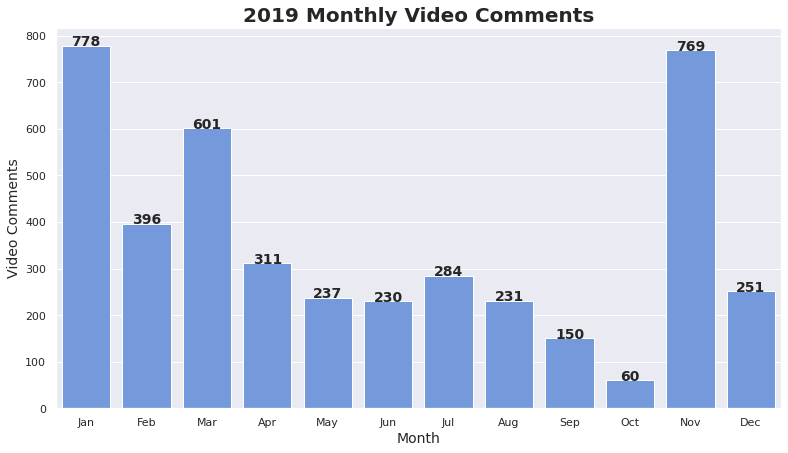

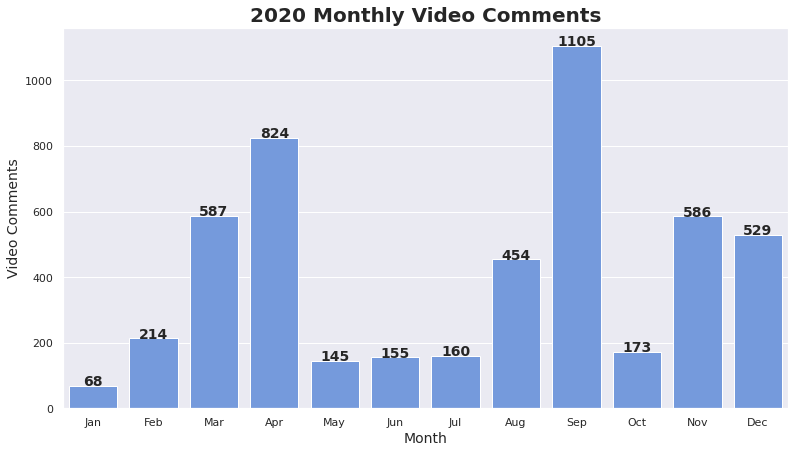

In [32]:
cal_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2018, 2019, 2020]

# Looping through each year
for x in years:

    # Creating dataset with uploads count per month
    uploads = yt_df.groupby(by = ['year', 'month']).count()
    uploads.reset_index(inplace = True)

    # Setting up bar chart
    ax = sns.barplot(x = 'month', y = 'comments_count',data = views_likes[views_likes['year']==x], color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Monthly Video Comments', fontsize='20', weight='bold')
    ax.set_xlabel('Month', fontsize='14')
    ax.set_ylabel('Video Comments', fontsize='14')

    # Setting x axis tick labels
    ax.set_xticklabels(cal_months) 
    
    # Changing the y axis labels to thousands
    ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x))))
    
    # Showing values at the top of the bar
    show_values_on_bars(ax)
    
    # Saving figure
    plt.savefig('monthly_video_comments_'+ str(x) +'.png')
    
    plt.show()

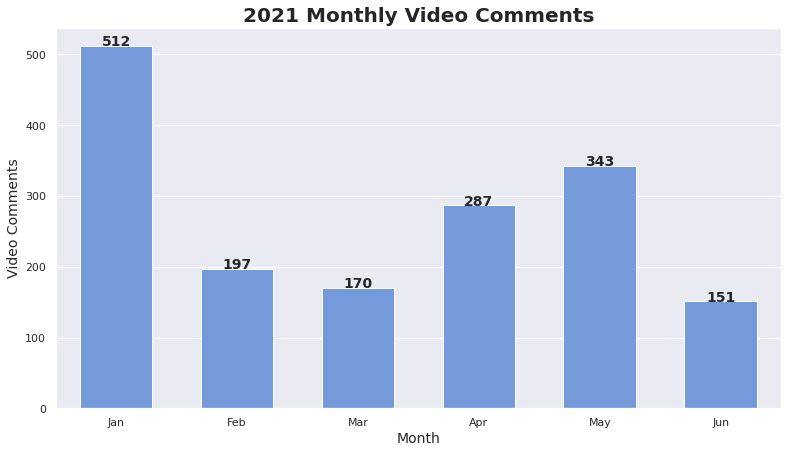

In [33]:
# Setting up bar chart
ax = sns.barplot(x = 'month', y = 'comments_count',data = views_likes[views_likes['year']==2021], color = 'cornflowerblue')

# Setting the title, x and y axis labels
ax.set_title('2021 Monthly Video Comments', fontsize='20', weight='bold')
ax.set_xlabel('Month', fontsize='14')
ax.set_ylabel('Video Comments', fontsize='14')

# Function to change width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Changing width of the width
change_width(ax, .6)

# Setting x axis tick labels
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

# Changing the y axis labels to thousands
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x))))

# Showing values at the top of the bar
show_values_on_bars(ax)

# Saving figure
plt.savefig('monthly_video_comments_'+ str(2021) +'.png')

plt.show()

## 7. Top 5  Commented Videos

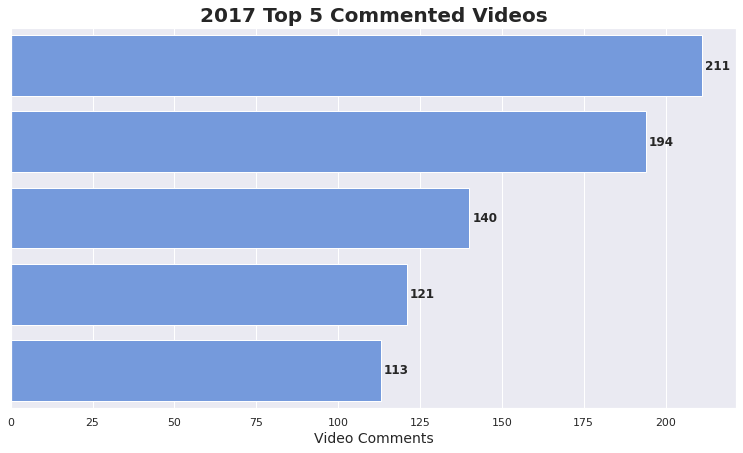

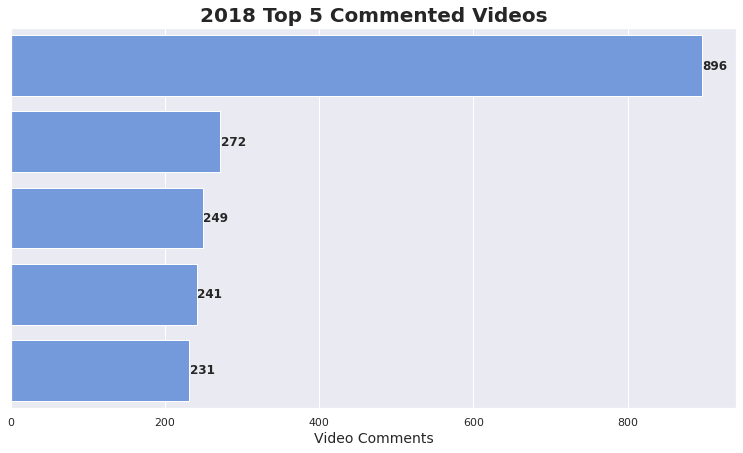

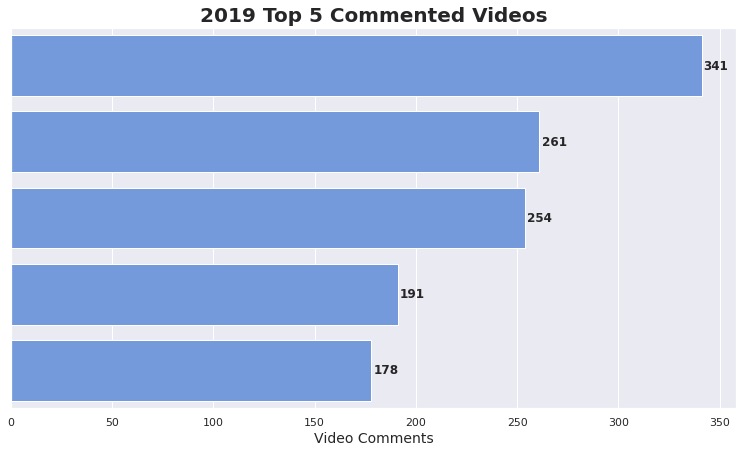

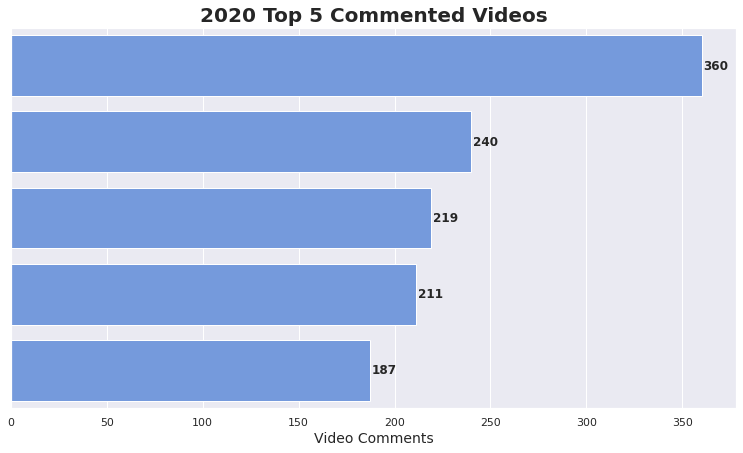

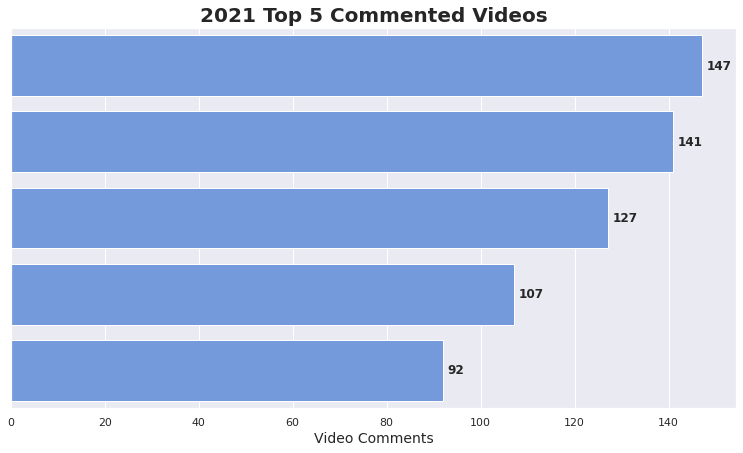

In [34]:
# Years for graphs
years = [2017, 2018, 2019, 2020, 2021]

for x in years:
    
    # Sorting and selcting top 5 values of dataframe
    top_5_comments = top_5[top_5['year']==x].sort_values(by = 'comments_count', ascending = False)[:5]
    
    # Creating the bar chart
    ax = sns.barplot(x = 'comments_count', y = 'video_title',data = top_5_comments, color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Top 5 Commented Videos', fontsize='20', weight='bold')
    ax.set_xlabel('Video Comments', fontsize='14')
    ax.set_ylabel('', fontsize='14')

    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width + 1,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.0f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center',
               weight = 'bold')  # vertical alignment
    
    # Removing y axis tick lables
    ax.set(yticklabels=[])
    
    # Saving figure
    plt.savefig('top_5_commented_videos_'+ str(x) +'.png')
    
    plt.show()

## 8. Top 5 Likes to Dislikes Ratio

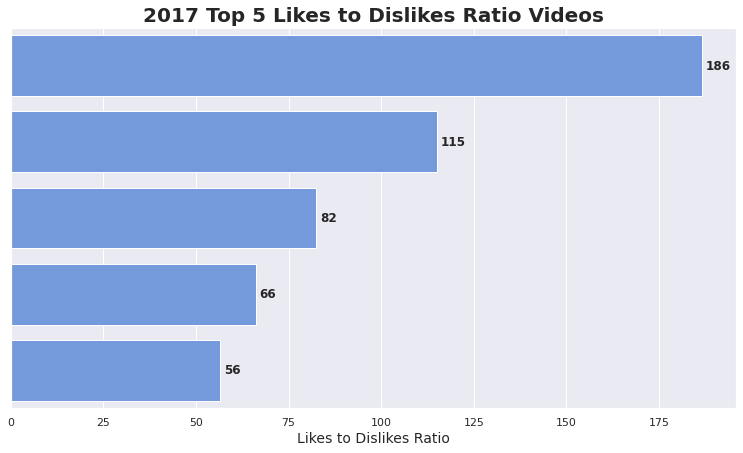

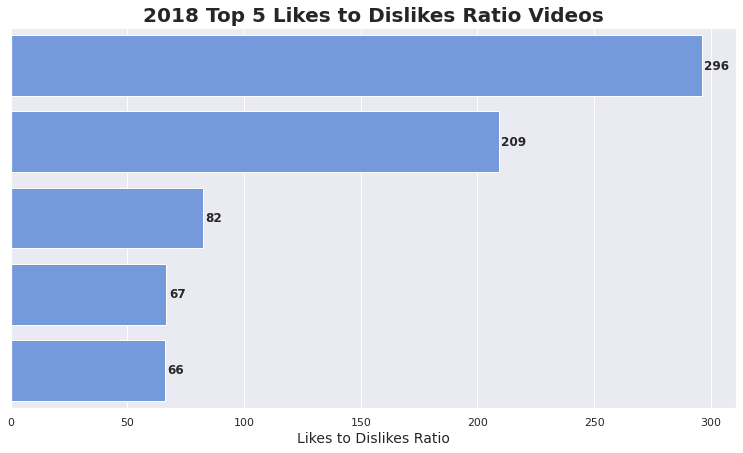

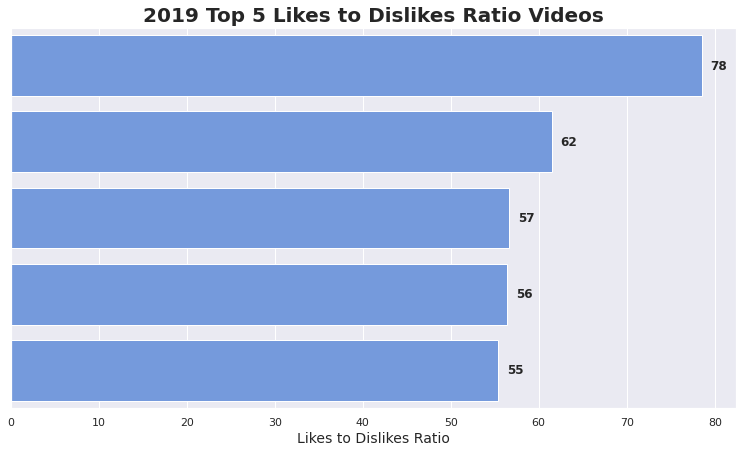

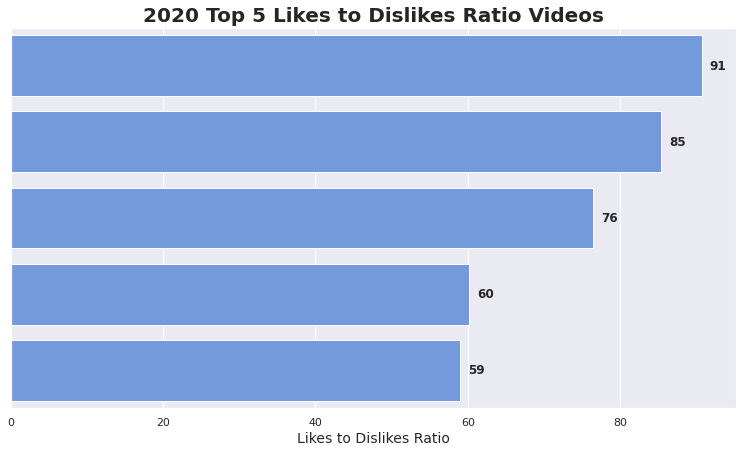

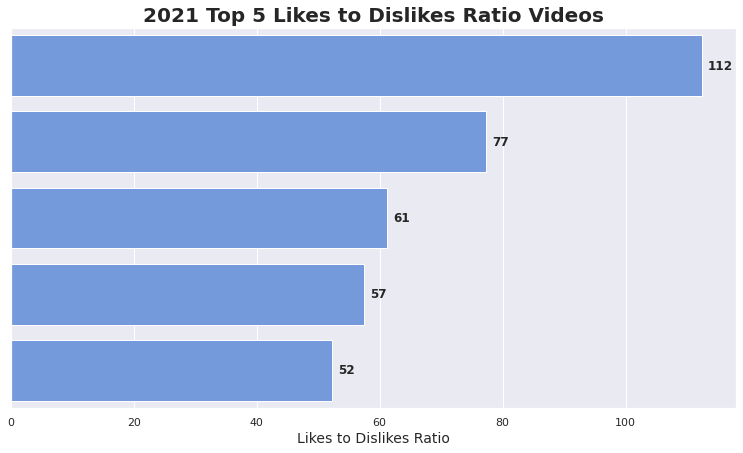

In [35]:
# Years for graphs
years = [2017, 2018, 2019, 2020, 2021]

for x in years:
    
    # Sorting and selcting top 5 values of dataframe
    top_5_likes_dislikes = top_5[top_5['year']==x].sort_values(by = 'likes_dislikes_ratio', ascending = False)[:5]
    
    # Creating the bar chart
    ax = sns.barplot(x = 'likes_dislikes_ratio', y = 'video_title',data = top_5_likes_dislikes, color = 'cornflowerblue')

    # Setting the title, x and y axis labels
    ax.set_title(str(x) + ' Top 5 Likes to Dislikes Ratio Videos', fontsize='20', weight='bold')
    ax.set_xlabel('Likes to Dislikes Ratio', fontsize='14')
    ax.set_ylabel('', fontsize='14')

    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width + 1,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.0f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center',
               weight = 'bold')  # vertical alignment
    
    # Removing y axis tick lables
    ax.set(yticklabels=[])
    
    # Saving figure
    plt.savefig('top_5_likes_to_dislikes_ratio_'+ str(x) +'.png')
    
    plt.show()

## 9. Top 5 Sentiment Videos

## 10. Keywords Wordcloud